# Guided Project: Analyzing CIA Factbook Data Using SQLite and Python

This project aims to analyze a dataset using SQLite fundamental methods, including basic keywords, summary statistics, grouping, and subqueries.

The database we use is from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compilation of statistics regarding all countries on Earth. Its SQLite version is `factbook.db` which can be downloaded via [this Github repo](https://github.com/factbook/factbook.sql/releases).

## 1. Importing

The first step is importing the database. We use sqlite3, pandas, and matplotlib modules. The pandas and matplotlib can neatly display and visualize results, leaving a better focus for practicing working in SQL.

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")

# Returning information on the tables of factbook.db.
query_db_info = "SELECT * FROM sqlite_master WHERE type = \"table\";"
result_db_info = pd.read_sql_query(query_db_info, conn)
print("Factbook.db tables information:")
print(result_db_info)

Factbook.db tables information:
    type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  


From above, we can see that there are two tables in `factbook.db`: `sqllite_sequence` and `facts`. By observation, the table `facts` turns out to be the main table that we will assess in this project.

Now, we try to take a brief look at the `facts` table by querying for its first five rows.

In [2]:
# Returning first 5 rows of `facts` table.
query_2 = "SELECT * FROM facts LIMIT 5"
result_2 = pd.read_sql_query(query_2, conn)
print("First 5 rows of `facts` table:")
print(result_2)

First 5 rows of `facts` table:
   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46  


There are a total of 11 columns in `facts`. Below are the descriptions of some of the columns:
1. `name` : The name of the country.
2. `population` : The country's population number.
3. `population_growth` : Population growth as a percentage.
4. `birth_rate` : The number of births a year per 1,000 people.
5. `area`: Total area, both land and water.
6. `area_land`: Land area, in square kilometers.

# 2. Calculating Summary Statistics

We can count several summary statistics, such as the minimum and maximum of each country's population and population growth. Their associated columns are `population` and `population growth`, respectively.

In [3]:
query_3 = "SELECT MIN(population) FROM facts"
result_3 = pd.read_sql_query(query_3, conn)
print(result_3)

   MIN(population)
0                0


In [4]:
query_4 = "SELECT MAX(population) FROM facts"
result_4 = pd.read_sql_query(query_4, conn)
print(result_4)

   MAX(population)
0       7256490011


In [5]:
query_5 = "SELECT MIN(population_growth) FROM facts"
result_5 = pd.read_sql_query(query_5, conn)
print(result_5)

   MIN(population_growth)
0                     0.0


In [6]:
query_6 = "SELECT MAX(population_growth) FROM facts"
result_6 = pd.read_sql_query(query_6, conn)
print(result_6)

   MAX(population_growth)
0                    4.02


Based on above queries' executions, there is a country with a population of `min(population) = 0`, as well as a country with a population of `max(population) = 7256490011` (more than 7 billions people). We can find out which country(s) have this many populations.

In [7]:
# Finding country(s) with minimal populations
query_7 = '''
SELECT name
FROM facts
WHERE population ==
''' + str(result_3.iloc[0,0]) # result_3 bears the value of min population
result_7 = pd.read_sql_query(query_7, conn)
print("Country(s) with minimum populations:")
print(result_7)

Country(s) with minimum populations:
         name
0  Antarctica


In [8]:
# Finding country(s) with maximal populations
query_8 = '''
SELECT name
FROM facts
WHERE population ==
''' + str(result_4.iloc[0,0]) # result_4 bears the value of max population
result_8 = pd.read_sql_query(query_8, conn)
print("Country(s) with maximum populations:")
print(result_8)

Country(s) with maximum populations:
    name
0  World


From the results, we can see that `"Antartica"` is the _country_ with 0 population, and `"World"` is the _country_ with around 7.2 billions people. This matches the fact that there is no citizens in Antartica continent and there is approximately 7 billions people on Earth. However, these two are not official countries, so we will ignore these two rows in the next queries.

## 3.1 Data Cleaning

We want to visualize four variables: `population`, `population_growth`, `birth_rate`, and `death_rate`. We start with a query that returns these four values for all rows except for countries `"Antartica"` and `"World"`.

In [9]:
# Create `facts` with column id and four variables
#    without Antartica and World.
query_9 = '''
SELECT
    id, -- This is very useful for JOIN, etc
    population,
    population_growth,
    birth_rate,
    death_rate
FROM facts
WHERE name NOT IN ("Antartica", "World")
'''
result_9 = pd.read_sql_query(query_9, conn)
print(result_9)

      id   population  population_growth  birth_rate  death_rate
0      1   32564342.0               2.32       38.57       13.89
1      2    3029278.0               0.30       12.92        6.58
2      3   39542166.0               1.84       23.67        4.31
3      4      85580.0               0.12        8.13        6.96
4      5   19625353.0               2.78       38.78       11.49
5      6      92436.0               1.24       15.85        5.69
6      7   43431886.0               0.93       16.64        7.33
7      8    3056382.0               0.15       13.61        9.34
8      9   22751014.0               1.07       12.15        7.14
9     10    8665550.0               0.55        9.41        9.42
10    11    9780780.0               0.96       16.64        7.07
11    12     324597.0               0.85       15.50        7.05
12    13    1346613.0               2.41       13.66        2.69
13    14  168957745.0               1.60       21.14        5.61
14    15     290604.0    

Looking the initial result, there are some rows that have at least one missing value. We will try to examine the corresponding rows with missing values. My first instinct was to parse `result_9` using boolean mask vectorization.

In [10]:
result_9_na = result_9[result_9.isnull().any(axis = 1)]

However, I remember that one consequence of our projact aim is to manipulate data using SQLite, instead of using pandas. Therefore we will employ subqueries, using string concatenation on `query_` variables.

In [11]:
# Select rows of result_9 with missing values.
query_9_na = '''
SELECT *
FROM (''' + query_9 + ''')
WHERE population IS NULL
    OR population_growth IS NULL
    OR birth_rate IS NULL
    OR death_rate IS NULL
'''
result_9_na = pd.read_sql_query(query_9_na, conn)
print(result_9_na)

     id  population  population_growth birth_rate death_rate
0    92   1870981.0                NaN       None       None
1   190       842.0               0.00       None       None
2   198         NaN                NaN       None       None
3   199      1530.0               1.11       None       None
4   200       596.0               0.00       None       None
5   201         NaN                NaN       None       None
6   202         NaN                NaN       None       None
7   203      2210.0               0.01       None       None
8   208         NaN                NaN       None       None
9   210         NaN                NaN       None       None
10  212      7237.0                NaN       None       None
11  213     31754.0                NaN       None       None
12  220      1190.0               0.03       None       None
13  221      1337.0               0.01       None       None
14  222         NaN                NaN       None       None
15  223         NaN     

Notice that every row that has a missing value also has its `birth_rate` and `death_rate` missing. Since we cannot visualize any row with a missing value, and since we cannot predict `birth_rate` nor `death_rate` based on existing knowledge, we should delete these rows.

We store the new table as `result_9_revised`.

In [12]:
# Crosscheck
print("Result_9 length: ", len(result_9))
query_9_revised = '''
SELECT *
FROM (''' + query_9 + ''')
WHERE id NOT IN (
    SELECT id
    FROM (''' + query_9_na + ''')
)
'''
result_9_revised = pd.read_sql(query_9_revised, conn)
print("Result_9_revised length: ", len(result_9_revised))

Result_9 length:  260
Result_9_revised length:  227


## 3.2 Generating Histograms

Now we are ready to build a 2 x 2 grid of histograms. We will import `matplotlib.pyplot` and `seaborn` (for a better style).

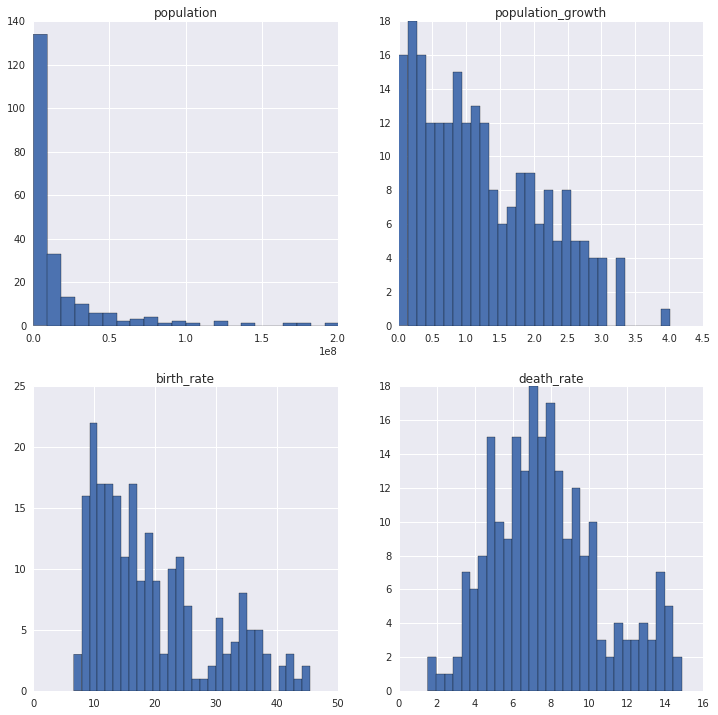

In [13]:
# Rendering the plots.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# Rename the cleaned result_9 as facts_cleaned, for easiness.
facts_cleaned = result_9_revised

col_labels_list = ["population", "population_growth", "birth_rate", "death_rate"]
bins_list = [150, 30, 30, 30]
# The histogram for population has some outliers such as India and China.
#   For this purpose, the maximum x limit for population is set to 2*10^8
max_xlim_list = [2 * 10**8, 4.5, 50, 16]

fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flatten()
for i in range(len(col_labels_list)):
    col = col_labels_list[i]
    ax[i].hist(facts_cleaned[col], bins = bins_list[i])
    ax[i].set_title(col)
    ax[i].set_xlim(0, max_xlim_list[i])

# Set style with seaborn as white
sns.set_style("white")
plt.show()

## 4. Finding Countries with Highest Population Density

We first build a query called `query_f`, which returns a table `f` that contains country, population density, and ratio of areas of water versus areas of land. Afterwards, we can refer to this query to sort the table `facts` based on each population density and water-land ratio.

In [14]:
query_f = '''
SELECT
    name,
    population * 1.0 / area_land AS ppl_density,
    area_water * 1.0 / area_land AS water_land_ratio
FROM facts
'''

Now we write the query that sorts `facts` based on population density:

In [15]:
# Sort based on people_density
query_10 = '''
WITH f AS (''' + query_f + ''')
SELECT
    name,
    ppl_density
FROM f
ORDER BY ppl_density DESC
'''
result_10 = pd.read_sql_query(query_10, conn)
print(result_10.head(10))

         name   ppl_density
0       Macau  21168.964286
1      Monaco  15267.500000
2   Singapore   8259.784571
3   Hong Kong   6655.271202
4  Gaza Strip   5191.819444
5   Gibraltar   4876.333333
6     Bahrain   1771.859211
7    Maldives   1319.640940
8       Malta   1310.015823
9     Bermuda   1299.925926


It can be seen that the countries with highest population density is Macau, Monaco, Singapore, Hong Kong, and Gaza Strip. The result matches the one [from Wikipedia](https://simple.wikipedia.org/wiki/List_of_countries_by_population_density).

We now make a similar query to find out which countries have the highest ratios of water to land.

In [16]:
# Sort based on water_land_ratio
query_11 = '''
WITH f AS (''' + query_f + ''')
SELECT
    name,
    water_land_ratio
FROM f
ORDER BY water_land_ratio DESC
'''
result_11 = pd.read_sql_query(query_11, conn)
print(result_11.head(10))

                             name  water_land_ratio
0  British Indian Ocean Territory        905.666667
1                  Virgin Islands          4.520231
2                     Puerto Rico          0.554791
3                    Bahamas, The          0.386613
4                   Guinea-Bissau          0.284673
5                          Malawi          0.259396
6                     Netherlands          0.225710
7                          Uganda          0.222922
8                         Eritrea          0.164356
9                         Liberia          0.156240


From here, we can conclude that
1. The countries with highest ratios of water to land are British Indian Ocean Territory (905.67 : 1), followed by Virgin Islands (4.52 : 1), Puerto Rico (0.55 : 1), Bahamas (0.39 : 1), and Guinea-Bissau (0.28 : 1).
2. By definition, a country has more water than land if and only if `water_land_ratio > 1`. Therefore the only countries owning more water than land are British Indian Ocean Territory and Virgin Islands.

## 5. Conclusion